# Figure 1

Author: Sandra Godinho Silva \
Creation date: 23/09/2020 \
Version: 0.1

In [324]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [325]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10)

## Imports

In [326]:
metrics = pd.read_csv("../../1_Dataset_creation/Dataset.csv")
metrics = metrics.rename(columns={"Genome_ID":"Assembly accession"})
metrics.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,Medium
1,GCA_000023285.1,GCA_000023285.1_ASM2328v1_genomic,p__Bacteroidetes (UID2605),100.00,0.00,0.0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga ochracea,1,1,2612925,2612925,0.0,1,2612925,1,2612925,1,2612925,1,2612925,2612925,2612925,1,100.0,0.39588,0.0,Medium


In [327]:
metadata = pd.read_csv("../../2_Metadata/Metadata_final.csv")
metadata.head(2)

,Assembly accession,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacterium johnsoniae UW101,NaN,NaN,Aerobic,identical,NaN,NaN,NaN,NaN,NaN,2014-01-28T00:00:00.000,NaN,NC_009441,representative genome,5017.0,NaN,assembly from type material,Major,NaN,Non-halophilic,SAMN02598357,CP000685,NaN,2007/05/01,DOE Joint Genome Institute,NaN,NaN,NaN,NaN,complete,NaN,986.0,NaN,No,ATCC 17061,NaN,NaN,Generic,Generic.1.0,US DOE Joint Genome Institute,NaN,NaN,376686.0,NaN,20-30,Mesophilic,NaN,NaN,type strain of Flavobacterium johnsoniae,Yes,NaN,latest,NaN,NaN,NaN,False,Non_marine
1,GCA_000023285.1,ASM2328v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA29403,SAMN00001911,NaN,Generic sample from Capnocytophaga ochracea DS...,NaN,NaN,Rod,NaN,NaN,Capnocytophaga ochracea DSM 7271,2009-04-30T00:00:00Z,NaN,NaN,1.0,NaN,DSM 7271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [328]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics = statistics.rename(columns={"Unnamed: 0":"Assembly accession"})
statistics.head(2)

,Assembly accession,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_002431085.1,2758,4628,1162,1809,47,42.131980,65.591008,1.704133
1,GCA_002302445.1,2226,3776,859,1364,65,38.589398,61.275831,2.920036


In [329]:
statistics.describe()

,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,3199.770235,5272.502424,1231.480045,2000.995151,88.091011,39.462142,63.335659,2.656457
std,955.167195,1434.360160,291.250417,537.250808,51.359604,4.173492,4.446347,1.068066
min,552.000000,1103.000000,325.000000,454.000000,8.000000,14.633840,26.767994,0.590120
25%,2536.000000,4274.000000,1020.000000,1610.000000,53.000000,36.768150,60.596850,1.964840
50%,3172.000000,5351.000000,1257.000000,2012.000000,81.000000,39.174389,63.353500,2.432147
75%,3825.000000,6244.000000,1431.000000,2375.000000,108.000000,41.563636,65.752186,3.011259
max,7961.000000,8877.000000,1978.000000,3349.000000,316.000000,58.876812,82.246377,8.152511


## Merge

In [330]:
dataset = pd.merge(metrics, statistics, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge")
dataset["merge"].value_counts()

both          2680
right_only       0
left_only        0
Name: merge, dtype: int64

In [331]:
dataset = pd.merge(dataset, metadata, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge2")
dataset["merge2"].value_counts()

both          2680
right_only       0
left_only        0
Name: merge2, dtype: int64

In [332]:
dataset.drop(columns=["merge", "merge2"], inplace=True)
dataset.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,Medium,5192,8348,1843,3127,244,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacte

In [333]:
dataset.to_csv("All_info.csv", index=False)

# Numbers

In [334]:
dataset.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]].round(2)

,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid
mean,96.06,0.84,9.97,91.84,81.21,105.42,3579242.27,3574865.26,0.16,14.35,953766.02,17.59,877389.92,44.03,732450.88,55.04,676882.60,1176468.28,1095297.83,11.48,78.25,0.36,0.03,3200.31,5273.46,1231.65,2001.29,88.11,39.46,63.33,2.66,91.58,9606.0,1283290.65,1.26,3127.69,1242010.45
std,8.50,1.18,23.22,11.40,132.31,216.69,1101861.86,1102898.78,0.66,30.11,1430723.65,42.49,1395113.70,90.91,1445229.10,134.16,1408258.08,1364500.60,1334452.79,9.13,31.95,0.04,0.02,954.93,1433.76,291.18,537.14,51.36,4.17,4.45,1.07,144.10,0.0,849892.82,0.65,960.45,907416.18
min,50.31,0.00,0.00,50.01,1.00,1.00,569462.00,569462.00,0.00,1.00,2659.00,1.00,1884.00,1.00,545.00,1.00,518.00,11420.00,9123.00,0.00,0.00,0.28,0.00,552.00,1103.00,325.00,454.00,8.00,14.63,26.77,0.59,1.00,9606.0,102.00,1.00,5.00,102.00
25%,98.35,0.09,0.00,91.32,14.00,17.00,2805386.25,2803262.50,0.00,2.00,84056.00,2.00,76662.00,6.00,21232.50,7.00,19938.00,233317.00,219077.75,2.00,71.36,0.33,0.01,2537.50,4274.00,1020.00,1610.00,53.00,36.77,60.60,1.97,16.00,9606.0,360293.00,1.00,2528.50,266748.00
50%,99.52,0.49,0.00,96.37,39.00,44.00,3545543.00,3543446.50,0.00,5.00,294681.00,5.00,259833.00,14.00,85478.00,15.00,75395.50,635417.00,579071.00,11.00,94.89,0.35,0.03,3172.00,5352.50,1257.00,2012.00,81.00,39.17,63.35,2.43,44.00,9606.0,1500283.00,1.00,3041.00,1382466.00
75%,100.00,1.08,0.00,98.75,90.00,101.00,4277908.00,4275901.50,0.02,12.00,822818.75,13.00,680443.50,39.00,235485.25,42.00,188814.00,1483307.50,1222603.25,18.00,99.15,0.37,0.04,3825.00,6244.25,1431.00,2375.50,108.00,41.56,65.75,3.01,103.00,9606.0,1951810.50,1.00,3713.50,1951803.50
max,100.00,9.68,100.00,100.00,1512.00,5612.00,7041311.00,7041311.00,11.48,418.00,6653812.00,1103.00,6653812.00,1182.00,6653812.00,3546.00,6653812.00,6653812.00,6653812.00,54.00,100.00,0.55,0.17,7961.00,8877.00,1978.00,3349.00,316.00,58.88,82.25,8.15,1512.00,9606.0,2698827.00,3.00,9339.00,2767188.00


In [335]:
statistics_classification = dataset.groupby("Classification_quality").describe()
statistics_classification2 = statistics_classification.T.round(2)
col = ["High", "Medium", "Low"]
statistics_classification2 = statistics_classification2[col]
statistics_classification = statistics_classification2.loc(axis=0)[:, ["mean", "min", "max"]]
statistics_classification.T

Completeness               Contamination             \
                               mean    min    max          mean  min   max   
Classification_quality                                                       
High                          98.42  90.14  100.0          0.59  0.0  4.16   
Medium                        98.41  80.03  100.0          0.71  0.0  9.56   
Low                           83.06  50.31  100.0          1.67  0.0  9.68   

                       Strain_heterogeneity              Quality_score         \
                                       mean  min     max          mean    min   
Classification_quality                                                          
High                                   0.17  0.0    9.09         95.45  71.57   
Medium                                 3.06  0.0   47.22         94.85  50.14   
Low                                   50.51  0.0  100.00         74.71  50.01   

                              n_scaffolds               n_contigs        \
                          max        mean   min     max      mean   min   
Classification_quality                                                    
High                    100.0      137.61  45.0   434.0    150.83  50.0   
Medium                  100.0       52.48   1.0  1512.0     66.15   1.0   
Low                      99.2      176.22   1.0  1506.0    259.26   1.0   

                                   scaf_bp                         contig_bp  \
                           max        mean        min        max        mean   
Classification_quality                                                         
High                     465.0  3609424.61  1378189.0  7005797.0  3607826.86   
Medium                  1782.0  3780489.39  1043041.0  7041311.0  3777698.75   
Low                     5612.0  2591461.99   569462.0  7026888.0  2577372.46   

                                             gap_pct             scaf_N50  \
                              min        max    mean  min    max     mean   
Classification_quality                                                      
High                    1378189.0  7005740.0    0.05  0.0   3.18    19.40   
Medium                  1043041.0  7041311.0    0.08  0.0   8.13     7.89   
Low                      569462.0  6570299.0    0.60  0.0  11.48    41.53   

                                       scaf_L50                     ctg_N50  \
                         min    max        mean      min        max    mean   
Classification_quality                                                        
High                    11.0   76.0    75013.34  12138.0   184823.0   21.00   
Medium                   1.0  353.0  1206463.57   3040.0  6653812.0    9.63   
Low                      1.0  418.0   408224.30   2659.0  5602501.0   53.14   

                                        ctg_L50                     scaf_N90  \
                         min     max       mean      min        max     mean   
Classification_quality                                                         
High                    11.0    80.0    70515.6  11189.0   179694.0    64.40   
Medium                   1.0   370.0  1106056.1   3040.0  6653812.0    24.34   
Low                      1.0  1103.0   392589.6   1884.0  5602501.0   123.04   

                                       scaf_L90                    ctg_N90  \
                         min     max       mean     min        max    mean   
Classification_quality                                                       
High                    28.0   253.0   21116.27  3054.0    72913.0   70.06   
Medium                   1.0  1121.0  932027.71   545.0  6653812.0   30.27   
Low                      1.0  1182.0  314708.99  1241.0  5602501.0  162.42   

                                        ctg_L90                     \
                         min     max       mean     min        max   
Classification_quality                                               
High                    28.0   261.0 

In [336]:
dataset["Classification_quality"].value_counts()

Medium    1961
Low        409
High       310
Name: Classification_quality, dtype: int64

In [337]:
dataset["Genus"].describe()

count               2680
unique               175
top       Flavobacterium
freq                 589
Name: Genus, dtype: object

In [338]:
dataset["Species"].describe()

count                             2680
unique                            1158
top       Flavobacterium psychrophilum
freq                               125
Name: Species, dtype: object

In [339]:
dataset["Host"].describe()

count              477
unique             156
top       Homo sapiens
freq               151
Name: Host, dtype: object

In [340]:
dataset["Sequencing platform resumed"].value_counts()

Illumina                            1401
PacBio                               156
Illumina; PacBio                      50
454                                   27
IonTorrent                            15
                                    ... 
Sanger                                 2
ABI 3730; Shimadzu DeNOVA-5500HT       1
PacBio; IonTorrent                     1
454; Illumina; Sanger                  1
Illumina; IonTorrent; 454              1
Name: Sequencing platform resumed, Length: 16, dtype: int64

In [341]:
dataset["Sequencing platform resumed"].describe()

count         1693
unique          16
top       Illumina
freq          1401
Name: Sequencing platform resumed, dtype: object

In [342]:
dataset["Geographic location (country or region)"].describe()

count     1659
unique     101
top        USA
freq       309
Name: Geographic location (country or region), dtype: object

In [343]:
dataset["Family"].value_counts()

Flavobacteriaceae    1923
Weeksellaceae         757
Name: Family, dtype: int64

In [344]:
dataset["MAG"].value_counts()

False    1988
True      692
Name: MAG, dtype: int64

In [345]:
dataset["MAG"].value_counts(normalize=True) * 100

False    74.179104
True     25.820896
Name: MAG, dtype: float64

In [346]:
dataset.groupby("MAG").describe()

Completeness                                                        \
             count       mean        std    min     25%    50%       75%   
MAG                                                                        
False       1988.0  99.363169   1.443353  72.67  99.290  99.65  100.0000   
True         692.0  86.588483  12.370240  50.31  78.905  90.39   97.4225   

             Contamination                                                     \
         max         count      mean       std  min   25%   50%     75%   max   
MAG                                                                             
False  100.0        1988.0  0.583094  0.725286  0.0  0.00  0.42  0.8300  8.97   
True   100.0         692.0  1.594754  1.764115  0.0  0.29  1.07  2.2125  9.68   

      Strain_heterogeneity                                                    \
                     count       mean        std  min  25%  50%   75%    max   
MAG                                                                            
False               1988.0   5.348099  18.043462  0.0  0.0  0.0   0.0  100.0   
True                 692.0  23.239090  30.265815  0.0  0.0  7.9  40.0  100.0   

      Quality_score                                                       \
              count       mean        std    min      25%     50%    75%   
MAG                                                                        
False        1988.0  96.447701   4.053925  55.15  95.0175  97.520  99.10   
True          692.0  78.614711  14.855648  50.01  66.3150  80.225  92.13   

             n_scaffolds                                                  \
         max       count        mean         std  min   25%   50%    75%   
MAG                                                                        
False  100.0      1988.0   51.932596   94.395993  1.0   7.0  29.0   60.0   
True   100.0       692.0  165.338150  180.808871  1.0  47.0  97.5  222.0   

              n_contigs                                                   \
          max     count        mean         std  min   25%    50%    75%   
MAG                                                                        
False  1512.0    1988.0   55.385815   97.433603  1.0   9.0   33.0   64.0   
True   1445.0     692.0  249.154624  356.171308  1.0  55.0  129.0  322.0   

              scaf_bp                                                    \
          max   count          mean           std        min        25%   
MAG                                                                       
False  1678.0  1988.0  3.868933e+06  9.634540e+05  1515248.0  3142742.0   
True   5612.0   692.0  2.747008e+06  1.050139e+06   569462.0  1854367.5   

                                        contig_bp                              \
             50%         75%        max     count          mean           std   
MAG                                                                             
False  3856579.5  4486833.75  7041311.0    1988.0  3.867621e+06  9.628547e+05   
True   2799624.5  3322207.00  7026888.0     692.0  2.733827e+06  1.046464e+06   

                                                              gap_pct  \
             min         25%        50%        75%        max   count   
MAG                                                                     
False  1515248.0  3139257.50  3856579.5  4485103.5  7041311.0  1988.0   
True    569462.0  1837204.25  2793944.5  3312493.5  6570299.0   692.0   

                                                            scaf_N50  \
           mean       std  min  25%    50%      75%     max    count   
MAG                                                                    
False  0.032878  0.253894  0.0  0.0  0.000  0.00500   8.133   1988.0   
True   0.510746  1.146249  0.0  0.0  0.057  0.54225  11.485    692.0   

                                                          scaf_L50  \
            mean        std  min  25%   50%    75%    max    count   
MAG                       

In [347]:
dataset["Origin"].value_counts()

Unclassified    990
Non_marine      898
Marine          792
Name: Origin, dtype: int64

In [348]:
dataset.groupby(["Origin", "MAG"]).describe()

267981e+05  7.732992e+05   692.0   3048.00   

                                                   scaf_max                \
                         50%        75%        max    count          mean   
Origin       MAG                                                            
Marine       False  133575.0  1150889.0  5793053.0    353.0  1.691407e+06   
             True     8746.0    20472.5  5482391.0    439.0  2.156365e+05   
Non_marine   False   97785.0   268308.5  6209424.0    702.0  1.430615e+06   
             True    11572.5    29971.5  4239128.0    196.0  2.975063e+05   
Unclassified False  122000.0   341354.0  6653812.0    933.0  1.479513e+06   
             True     8014.0    28853.0  5854969.0     57.0  3.195658e+05   

                                                                           \
                             std      min       25%        50%        75%   
Origin       MAG                                                            
Marine       False  1.439397e+06  87453.0  564928.0  1014695.0  3041304.0   
             True   3.982794e+05  11420.0   56401.5   104936.0   220220.5   
Non_marine   False  1.446523e+06  21221.0  410954.0   856509.0  2095447.5   
             True   4.636850e+05  13713.0   73032.5   143697.5   333525.5   
Unclassified False  1.398619e+06  30015.0  493595.0   878905.0  2120369.0   
             True   7.806370e+05  16796.0   39786.0   132552.0   325540.0   

                              ctg_max                                       \
                          max   count          mean           std      min   
Origin       MAG                                                             
Marine       False  5793053.0   353.0  1.596164e+06  1.415396e+06  87453.0   
             True   5482391.0   439.0  1.887840e+05  3.858840e+05  11280.0   
Non_marine   False  6363829.0   702.0  1.338371e+06  1.433147e+06  21221.0   
             True   4239228.0   196.0  2.406687e+05  3.897375e+05  13713.0   
Unclassified False  6653812.0   933.0  1.377888e+06  1.371104e+06  30015.0   
             True   5855069.0    57.0  2.947223e+05  7.766785e+05   9123.0   

                                                               scaf_n_gt50K  \
                          25%       50%         75%        max        count   
Origin       MAG                                                              
Marine       False  550060.00  938038.0  2862403.00  5793053.0        353.0   
             True    45147.00   87001.0   202641.00  5482391.0        439.0   
Non_marine   False  382728.50  730334.5  1655250.25  6209424.0        702.0   
             True    67015.25  130731.0   263527.75  4239128.0        196.0   
Unclassified False  450946.00  808118.0  1689630.00  6653812.0        933.0   
             True    38420.00  107154.0   291388.00  5854969.0         57.0   

                                                                      \
                         mean        std  min  25%   50%   75%   max   
Origin       MAG                                                       
Marine       False  11.339943   9.374653  1.0  2.0  10.0  17.0  46.0   
             True    8.635535   8.491963  0.0  1.0   7.0  13.5  43.0   
Non_marine   False  13.025641   9.334606  0.0  4.0  12.0  20.0  41.0   
             True   12.586735   9.121832  0.0  4.0  13.0  20.0  34.0   
Unclassified False  11.548767   8.779917  0.0  4.0  11.0  17.0  54.0   
             True   10.263158  10.242639  0.0  0.0  11.0  17.0  37.0   

                   scaf_pct_gt50K                                         \
                            count       mean        std    min       25%   
Origin       MAG                                                           
Marine       False          353.0  94.208742  10.752259  7.508  93.31600   
             True           439.0  37.621380  35.818745  0.000   3.42050   
Non_marine   False          702.0  89.752762  17.310303  0.000  88.23725   
             True           196.0  47.658179 

In [349]:
dataset["Origin"].value_counts(normalize=True) * 100

Unclassified    36.940299
Non_marine      33.507463
Marine          29.552239
Name: Origin, dtype: float64

In [350]:
statistics_classification = dataset.groupby("Classification_quality").describe()
statistics_classification2 = statistics_classification.T.round(2)
col = ["High", "Medium", "Low"]
statistics_classification2 = statistics_classification2[col]
statistics_classification = statistics_classification2.loc(axis=0)[:, ["mean", "min", "max"]]
statistics_classification.T

Completeness               Contamination             \
                               mean    min    max          mean  min   max   
Classification_quality                                                       
High                          98.42  90.14  100.0          0.59  0.0  4.16   
Medium                        98.41  80.03  100.0          0.71  0.0  9.56   
Low                           83.06  50.31  100.0          1.67  0.0  9.68   

                       Strain_heterogeneity              Quality_score         \
                                       mean  min     max          mean    min   
Classification_quality                                                          
High                                   0.17  0.0    9.09         95.45  71.57   
Medium                                 3.06  0.0   47.22         94.85  50.14   
Low                                   50.51  0.0  100.00         74.71  50.01   

                              n_scaffolds               n_contigs        \
                          max        mean   min     max      mean   min   
Classification_quality                                                    
High                    100.0      137.61  45.0   434.0    150.83  50.0   
Medium                  100.0       52.48   1.0  1512.0     66.15   1.0   
Low                      99.2      176.22   1.0  1506.0    259.26   1.0   

                                   scaf_bp                         contig_bp  \
                           max        mean        min        max        mean   
Classification_quality                                                         
High                     465.0  3609424.61  1378189.0  7005797.0  3607826.86   
Medium                  1782.0  3780489.39  1043041.0  7041311.0  3777698.75   
Low                     5612.0  2591461.99   569462.0  7026888.0  2577372.46   

                                             gap_pct             scaf_N50  \
                              min        max    mean  min    max     mean   
Classification_quality                                                      
High                    1378189.0  7005740.0    0.05  0.0   3.18    19.40   
Medium                  1043041.0  7041311.0    0.08  0.0   8.13     7.89   
Low                      569462.0  6570299.0    0.60  0.0  11.48    41.53   

                                       scaf_L50                     ctg_N50  \
                         min    max        mean      min        max    mean   
Classification_quality                                                        
High                    11.0   76.0    75013.34  12138.0   184823.0   21.00   
Medium                   1.0  353.0  1206463.57   3040.0  6653812.0    9.63   
Low                      1.0  418.0   408224.30   2659.0  5602501.0   53.14   

                                        ctg_L50                     scaf_N90  \
                         min     max       mean      min        max     mean   
Classification_quality                                                         
High                    11.0    80.0    70515.6  11189.0   179694.0    64.40   
Medium                   1.0   370.0  1106056.1   3040.0  6653812.0    24.34   
Low                      1.0  1103.0   392589.6   1884.0  5602501.0   123.04   

                                       scaf_L90                    ctg_N90  \
                         min     max       mean     min        max    mean   
Classification_quality                                                       
High                    28.0   253.0   21116.27  3054.0    72913.0   70.06   
Medium                   1.0  1121.0  932027.71   545.0  6653812.0   30.27   
Low                      1.0  1182.0  314708.99  1241.0  5602501.0  162.42   

                                        ctg_L90                     \
                         min     max       mean     min        max   
Classification_quality                                               
High                    28.0   261.0 

# Geographic Distribution

In [351]:
dataset[["Geographic location","Geographic location (country or region)", "Geographic location (city)"]]

,Geographic location,Geographic location (country or region),Geographic location (city)
0,United Kingdom: England,United Kingdom,England
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Antarctica: Vostok Station,Antarctica,Vostok Station
4,NaN,NaN,NaN
...,...,...,...
2675,NaN,NaN,NaN
2676,NaN,NaN,NaN
2677,NaN,NaN,NaN
2678,NaN,NaN,NaN


In [352]:
dataset["Geographic location"].value_counts()

China                          116
USA:New York City               68
South Korea                     65
USA                             43
Sweden                          39
                              ... 
India: West Khasi Hills          1
Korea                            1
USA: TN                          1
South Korea:Jeju, Woljeong       1
Netherlands:Lake Ijsselmeer      1
Name: Geographic location, Length: 543, dtype: int64

In [353]:
dataset["Geographic location (country or region)"].value_counts()

USA                   309
China                 215
South Korea           184
Antarctica             74
Australia              64
                     ... 
Germany, Trier          1
Greenland               1
Tonga                   1
Madagascar              1
Germany, Helgoland      1
Name: Geographic location (country or region), Length: 101, dtype: int64

In [354]:
dataset["Geographic location (city)"].value_counts()

New York City                            68
off the coast of Alicante                23
Crystal Geyser near Green River, Utah    22
Kagami River                             17
North Atlantic Ocean                     17
                                         ..
Tataling River                            1
Hyogo                                     1
KY                                        1
VA                                        1
Burton Lake                               1
Name: Geographic location (city), Length: 451, dtype: int64

In [355]:
country = dataset["Geographic location (country or region)"].value_counts()
country.head()

USA            309
China          215
South Korea    184
Antarctica      74
Australia       64
Name: Geographic location (country or region), dtype: int64

In [356]:
dataset_reduced = dataset.groupby(["Geographic location (country or region)"]).filter(lambda x:x["Geographic location (country or region)"].count()>5)
df_plot = dataset_reduced.groupby(['Geographic location (country or region)', 'MAG']).size().reset_index().pivot(columns='MAG', index='Geographic location (country or region)', values=0).fillna(0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values(by="sum",ascending=False).reset_index()
df_plot = df_plot.rename(columns={True:"MAG", False:"Isolate"})
df_plot.head()

MAG,Geographic location (country or region),Isolate,MAG,sum
0,USA,169.0,140.0,309.0
1,China,208.0,7.0,215.0
2,South Korea,183.0,1.0,184.0
3,Antarctica,70.0,4.0,74.0
4,Australia,5.0,59.0,64.0


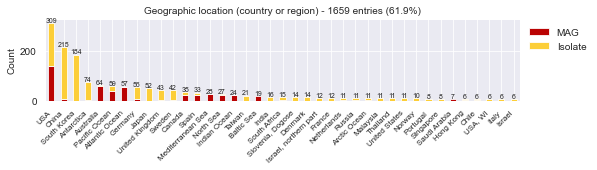

In [357]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=1.5) 

my_colors=["#BA0303","#FCCE38"]

ax = df_plot[["Geographic location (country or region)","MAG", "Isolate"]].plot(kind='bar', x="Geographic location (country or region)" ,figsize=(8.5,1.5), stacked=True, legend=False, color=my_colors, fontsize=10)#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))

temp_totals = df_plot["sum"].values.tolist()

for p,t in zip(ax.patches,temp_totals):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(t), (x.mean(),t),ha='center', va='bottom', fontsize=7) # set the alignment of the text

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=9)

# set labels and font size
ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.set_title("Geographic location (country or region) - 1659 entries (61.9%)", fontsize = 9)
plt.yticks(fontsize=8 )    
fig = ax.get_figure()

fig.savefig("Geo.svg", dpi=300, bbox_inches='tight')

# Sequencing Platform

In [358]:
dataset["Sequencing platform resumed"].value_counts()

Illumina                            1401
PacBio                               156
Illumina; PacBio                      50
454                                   27
IonTorrent                            15
                                    ... 
Sanger                                 2
ABI 3730; Shimadzu DeNOVA-5500HT       1
PacBio; IonTorrent                     1
454; Illumina; Sanger                  1
Illumina; IonTorrent; 454              1
Name: Sequencing platform resumed, Length: 16, dtype: int64

In [365]:
dataset_reduced = dataset.groupby(["Sequencing platform resumed"]).filter(lambda x:x["Sequencing platform resumed"].count()>5)
df_plot = dataset_reduced.groupby(["Sequencing platform resumed", 'MAG']).size().reset_index().pivot(columns='MAG', index="Sequencing platform resumed", values=0).fillna(0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values(by="sum",ascending=False).reset_index()
df_plot = df_plot.rename(columns={True:"MAG", False:"Isolate"})
df_plot.head()

MAG,Sequencing platform resumed,Isolate,MAG,sum
0,Illumina,744.0,657.0,1401.0
1,PacBio,152.0,4.0,156.0
2,Illumina; PacBio,48.0,2.0,50.0
3,454,27.0,0.0,27.0
4,IonTorrent,14.0,1.0,15.0


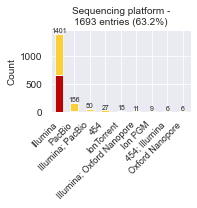

In [366]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=1.5) 

my_colors=["#BA0303","#FCCE38"]

ax = df_plot[["Sequencing platform resumed","MAG", "Isolate"]].plot(kind='bar', x="Sequencing platform resumed" ,figsize=(2.5,1.5), stacked=True, legend=False, color=my_colors, fontsize=10)#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))

temp_totals = df_plot["sum"].values.tolist()

for p,t in zip(ax.patches,temp_totals):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(t), (x.mean(),t),ha='center', va='bottom', fontsize=7) # set the alignment of the text

#ax.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=10)

# set labels and font size
ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.set_title("Sequencing platform -\n1693 entries (63.2%)", fontsize = 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=9)
plt.yticks(fontsize=10 )

    
fig = ax.get_figure()
fig.savefig("Seq.svg", dpi=300, bbox_inches='tight')

# Host

In [368]:
dataset_reduced = dataset.groupby(["Host"]).filter(lambda x:x["Host"].count()>2)
df_plot = dataset_reduced.groupby(["Host", 'MAG']).size().reset_index().pivot(columns='MAG', index="Host", values=0).fillna(0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values(by="sum",ascending=False).reset_index()
df_plot = df_plot.rename(columns={True:"MAG", False:"Isolate"})
df_plot.head()

MAG,Host,Isolate,MAG,sum
0,Homo sapiens,151.0,0.0,151.0
1,Oncorhynchus mykiss,48.0,0.0,48.0
2,"Human, homo sapiens",23.0,0.0,23.0
3,Plankton,0.0,11.0,11.0
4,Plecoglossus altivelis altivelis,10.0,0.0,10.0


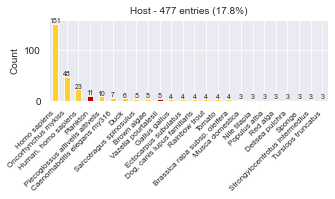

In [370]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="darkgrid")
sns.set_context("paper", font_scale=1.5) 

my_colors=["#BA0303","#FCCE38"]

ax = df_plot[["Host","MAG", "Isolate"]].plot(kind='bar', x="Host" ,figsize=(5,1.5), stacked=True, legend=False, color=my_colors)#, yerr="std")#, error_kw=dict(ecolor='black',elinewidth=0.5, barsabove=True))

temp_totals = df_plot["sum"].values.tolist()

for p,t in zip(ax.patches,temp_totals):
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(t), (x.mean(),t),ha='center', va='bottom', fontsize=7) # set the alignment of the text

#ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
# set labels and font size
ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('Count', fontsize = 10)
ax.set_title("Host - 477 entries (17.8%)", fontsize = 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=8)
plt.yticks(fontsize=10 )    

fig = ax.get_figure()
fig.savefig("Host.svg", dpi=300, bbox_inches='tight')